# Retention Risk Assesment
Group 
Jai Advitheeya Lella        #50607407
Niharika Reddy Katakam Prashanthi #50610925
Prathyusha Reddy Allam #50613222
Kundavaram Joseph Sujith Kumar #50600443


# PHASE 1
## Retention Risk Assessment

### QUESTION 1:

#### Problem Statement:
Customer churn can be considered as a crucial problem in the banking industry in which customers decide to stop the utilization of the bank's services due to several reasons. The objective of the project is coming up with a binary classification model that would be used effectively in predicting whether a customer is likely to churn based on the historic data of customers. By analyzing factors such as account balance, transaction history, credit score, and customer demographics, we aim to identify which customers are at high risk of leaving the bank.

#### Contribution:
This can make all the difference for the bank in its efforts toward customer retention, thereby reducing the costs of acquiring new customers. Precise prediction of churn allows the bank to take proactive measures toward forestalling the event, done through offering incentives in a personalized way or simply improving their customer service where dissatisfaction seems most evident.

#### Why is this crucial? 
Retaining customers is less expensive than acquiring new ones, and the customer loss may further lead to reduction of profits, especially when such high-value customers are involved. Knowing what generates churn will help provide strategic input to the bank in its endeavor for improvement of services and overall customer satisfaction, leading to long-term profitability and growth.

---

### QUESTION 2:

#### Research Questions:

1. *Do gender differences (male vs. female) play a role in customer exit rates?*
   - *Significance:* Men and women may have different banking requirements, leading to different churn behaviors. Knowing these trends may allow banks to offer gender-specific products and services. 

2. *How does a customer's credit score influence their likelihood of exiting the bank?*
   - *Significance:* A poor credit score may signal financial difficulties, putting these consumers at danger of leaving. Understanding this relationship can help banks develop targeted retention initiatives.

3. *How does the number of banking products a customer uses (e.g., loans, credit cards) affect their likelihood of exiting?*
   - *Significance:* Customers who purchase more products may be more engaged and less inclined to depart. Understanding this could help banks encourage clients to try new products as a retention strategy.

4. *How does a customer's age influence their decision to leave the bank?*
   - *Significance:* Different age groups may have distinct banking demands, with younger clients being more willing to move banks, while older customers may want stability.

5. *Are active members less likely to exit compared to inactive members?*
   - *Significance:* Active interaction with financial services may indicate loyalty. Encouraging more activity may lessen turnover.

6. *Is there a relationship between estimated salary and the likelihood of a customer exiting the bank?*
   - *Significance:* Customers with varying income levels may exhibit distinct financial behaviors, influencing their loyalty to a bank. This information can assist banks in designing goods and services to meet the needs of people with different income levels.

7. *Does having a credit card correlate with a customer's likelihood to exit the bank?*
   - *Significance:* A credit card could indicate a deeper level of interaction with the bank. Understanding this can help banks assess whether boosting credit card adoption can improve client retention.

8. *Does the tenure of a customer (length of time they have been with the bank) impact their retention?*
   - *Significance:* Long-term consumers may have built a stronger relationship with the bank. Knowing if tenure influences churn can help steer loyalty programs designed to retain long-term customers.

Questions in question 2 and EDA are done by :
Jai Advitheeya Lella  : 1,8
Niharika Reddy Katakam Prashanthi  : 2,5
Prathyusha Reddy Allam : 3,4
Kundavaram Joseph Sujith Kumar : 6,7

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the training data
data = pd.read_csv('train.csv')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


# Print the number of rows in each DataFrame
print("Number of records in Train Data:", train_data.shape[0])
print("Number of records in Test Data:", test_data.shape[0])

# Print the columns of the training dataset
print("Train Data Columns:")
print(train_data.columns)

# Print the columns of the test dataset
print("Test Data Columns:")
print(test_data.columns)

Number of records in Train Data: 132027
Number of records in Test Data: 33007
Train Data Columns:
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Test Data Columns:
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [93]:
# Debug: Print initial shape of the data
print("Initial Train Data Shape:", train_data.shape)
print("Initial Test Data Shape:", test_data.shape)

# 1. Remove Duplicates
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

# Debug: Print shape after removing duplicates
print("Train Data Shape after removing duplicates:", train_data.shape)
print("Test Data Shape after removing duplicates:", test_data.shape)

# Ensure both train and test data have the same columns before handling missing values
all_columns = set(train_data.columns).union(set(test_data.columns))
train_data = train_data.reindex(columns=all_columns)
test_data = test_data.reindex(columns=all_columns)

# Debug: Print shape after reindexing
print("Train Data Shape after reindexing:", train_data.shape)
print("Test Data Shape after reindexing:", test_data.shape)

Initial Train Data Shape: (132027, 14)
Initial Test Data Shape: (33007, 14)
Train Data Shape after removing duplicates: (132027, 14)
Test Data Shape after removing duplicates: (33007, 14)
Train Data Shape after reindexing: (132027, 14)
Test Data Shape after reindexing: (33007, 14)


In [94]:
# 2. Handle Missing Values
# Separate numeric and categorical columns
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
categorical_cols = train_data.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with the mean
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].mean())

# Debug: Print shape after filling missing values for numeric columns
print("Train Data Shape after filling missing numeric values:", train_data.shape)
print("Test Data Shape after filling missing numeric values:", test_data.shape)

# Fill missing values for categorical columns with the mode (if any)
if not categorical_cols.empty:
    if not train_data[categorical_cols].mode().empty:
        train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])
    if not test_data[categorical_cols].mode().empty:
        test_data[categorical_cols] = test_data[categorical_cols].fillna(test_data[categorical_cols].mode().iloc[0])

# Debug: Print shape after filling missing values for categorical columns
print("Train Data Shape after filling missing categorical values:", train_data.shape)
print("Test Data Shape after filling missing categorical values:", test_data.shape)

Train Data Shape after filling missing numeric values: (132027, 14)
Test Data Shape after filling missing numeric values: (33007, 14)
Train Data Shape after filling missing categorical values: (132027, 14)
Test Data Shape after filling missing categorical values: (33007, 14)


In [95]:
# 3. Set Proper Precision
pd.set_option('display.precision', 2)

In [96]:
# 4. Remove Outliers
# Define a function to remove outliers based on the IQR method

# Define numerical_columns
numerical_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    return df

train_data = remove_outliers(train_data, numerical_columns)
test_data = remove_outliers(test_data, numerical_columns)

# Debug: Print shape after removing outliers
print("Train Data Shape after removing outliers:", train_data.shape)
print("Test Data Shape after removing outliers:", test_data.shape)


Train Data Shape after removing outliers: (126706, 14)
Test Data Shape after removing outliers: (31684, 14)


In [97]:
# 4. Show General Characteristics of the Data
print("Train Data Description:")
print(train_data.describe())

print("\nTest Data Description:")
print(test_data.describe())

Train Data Description:
         Exited  EstimatedSalary  HasCrCard        Age  NumOfProducts  \
count  126706.0        126706.00  126706.00  126706.00      126706.00   
mean        0.2        112855.68       0.75      37.11           1.56   
std         0.4         50195.96       0.43       7.37           0.54   
min         0.0            11.58       0.00      18.00           1.00   
25%         0.0         74850.84       1.00      32.00           1.00   
50%         0.0        118711.75       1.00      37.00           2.00   
75%         0.0        155641.46       1.00      41.00           2.00   
max         1.0        199992.48       1.00      57.00           4.00   

       CustomerId  CreditScore         id  IsActiveMember    Balance  \
count    1.27e+05    126706.00  126706.00       126706.00  126706.00   
mean     1.57e+07       657.19   82400.74            0.49   55404.91   
std      7.14e+04        79.37   47689.83            0.50   62823.23   
min      1.56e+07       430.00

In [98]:
# 5. Calculate Measures of Spread for Numeric Columns Only
train_variance = train_data[numeric_cols].var()
train_std_dev = train_data[numeric_cols].std()
train_iqr = train_data[numeric_cols].quantile(0.75) - train_data[numeric_cols].quantile(0.25)

print("\nTrain Data Variance:")
print(train_variance)

print("\nTrain Data Standard Deviation:")
print(train_std_dev)

print("\nTrain Data Interquartile Range (IQR):")
print(train_iqr)

# Debug: Print columns to check if 'Gender' and 'Geography' exist
print("\nTrain Data Columns:")
print(train_data.columns)

print("\nTest Data Columns:")
print(test_data.columns)


Train Data Variance:
Exited             1.63e-01
EstimatedSalary    2.52e+09
HasCrCard          1.85e-01
Age                5.43e+01
NumOfProducts      2.97e-01
CustomerId         5.09e+09
CreditScore        6.30e+03
id                 2.27e+09
IsActiveMember     2.50e-01
Balance            3.95e+09
Tenure             7.88e+00
dtype: float64

Train Data Standard Deviation:
Exited                 0.40
EstimatedSalary    50195.96
HasCrCard              0.43
Age                    7.37
NumOfProducts          0.54
CustomerId         71355.60
CreditScore           79.37
id                 47689.83
IsActiveMember         0.50
Balance            62823.23
Tenure                 2.81
dtype: float64

Train Data Interquartile Range (IQR):
Exited                  0.00
EstimatedSalary     80790.62
HasCrCard               0.00
Age                     9.00
NumOfProducts           1.00
CustomerId         123751.00
CreditScore           112.00
id                  82661.25
IsActiveMember          1.00


In [99]:

# 6. Handle any remaining NaN or infinite values
print("\nShape before dropping NaNs:")
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

# Debug: Check for NaN or infinite values in numerical columns
print("\nNaN values in train_data:")
print(train_data[numeric_cols].isna().sum())

print("\nNaN values in test_data:")
print(test_data[numeric_cols].isna().sum())

print("\nInfinite values in train_data:")
print(np.isinf(train_data[numeric_cols]).sum())

print("\nInfinite values in test_data:")
print(np.isinf(test_data[numeric_cols]).sum())

# Replace infinite values with NaN
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Debug: Print shape after replacing infinite values
print("Train Data Shape after replacing infinite values:", train_data.shape)
print("Test Data Shape after replacing infinite values:", test_data.shape)

# Fill remaining NaN values with the mean of the column
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].mean())

print("\nShape after filling NaNs:")
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

# Check if DataFrames are empty
if train_data.empty or test_data.empty:
    raise ValueError("Train or test data is empty after cleaning. Please check the data for NaN or infinite values.")



Shape before dropping NaNs:
Train Data Shape: (126706, 14)
Test Data Shape: (31684, 14)

NaN values in train_data:
Exited             0
EstimatedSalary    0
HasCrCard          0
Age                0
NumOfProducts      0
CustomerId         0
CreditScore        0
id                 0
IsActiveMember     0
Balance            0
Tenure             0
dtype: int64

NaN values in test_data:
Exited             0
EstimatedSalary    0
HasCrCard          0
Age                0
NumOfProducts      0
CustomerId         0
CreditScore        0
id                 0
IsActiveMember     0
Balance            0
Tenure             0
dtype: int64

Infinite values in train_data:
Exited             0
EstimatedSalary    0
HasCrCard          0
Age                0
NumOfProducts      0
CustomerId         0
CreditScore        0
id                 0
IsActiveMember     0
Balance            0
Tenure             0
dtype: int64

Infinite values in test_data:
Exited             0
EstimatedSalary    0
HasCrCard          0


In [100]:

# 8. Normalize Numerical Features
scaler = StandardScaler()
numerical_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Debug: Print shape after normalization
print("Train Data Shape after normalization:", train_data.shape)
print("Test Data Shape after normalization:", test_data.shape)

Train Data Shape after normalization: (126706, 14)
Test Data Shape after normalization: (31684, 14)


In [101]:
# 9. Separate Features and Target Variable
X_train = train_data.drop('Exited', axis=1)
y_train = train_data['Exited'].values.reshape(-1, 1)
X_test = test_data.drop('Exited', axis=1)
y_test = test_data['Exited'].values.reshape(-1, 1)

# Debug: Print shape after separating features and target variable
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (126706, 13)
y_train Shape: (126706, 1)
X_test Shape: (31684, 13)
y_test Shape: (31684, 1)


In [102]:
# 10. Remove Highly Correlated Features (Excluding String Columns)
def remove_highly_correlated_features(df, threshold=0.9):
    # Select only numerical columns for correlation analysis
    numeric_df = df.select_dtypes(include=[np.number])
    
    corr_matrix = numeric_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Drop highly correlated numerical columns from the original dataframe
    df = df.drop(columns=to_drop)
    return df

train_data = remove_highly_correlated_features(train_data)
test_data = remove_highly_correlated_features(test_data)

# Debug: Print shape after removing highly correlated features
print("Train Data Shape after removing highly correlated features:", train_data.shape)
print("Test Data Shape after removing highly correlated features:", test_data.shape)


Train Data Shape after removing highly correlated features: (126706, 14)
Test Data Shape after removing highly correlated features: (31684, 14)


## EDA

### 1

Exit Rates by Gender:
 Gender
Female    0.28
Male      0.16
Name: Exited, dtype: float64
Exit Counts by Gender:
 Gender
Female    20105
Male      14816
Name: Exited, dtype: int64
Total Counts by Gender:
 Gender
Male      93150
Female    71884
Name: count, dtype: int64


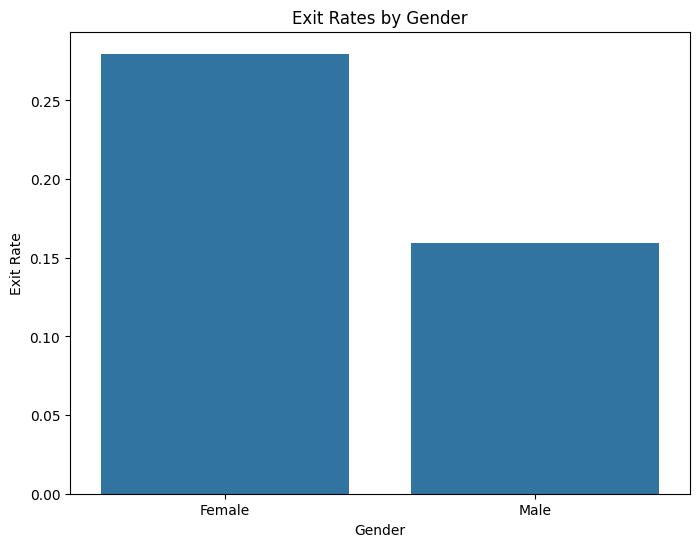

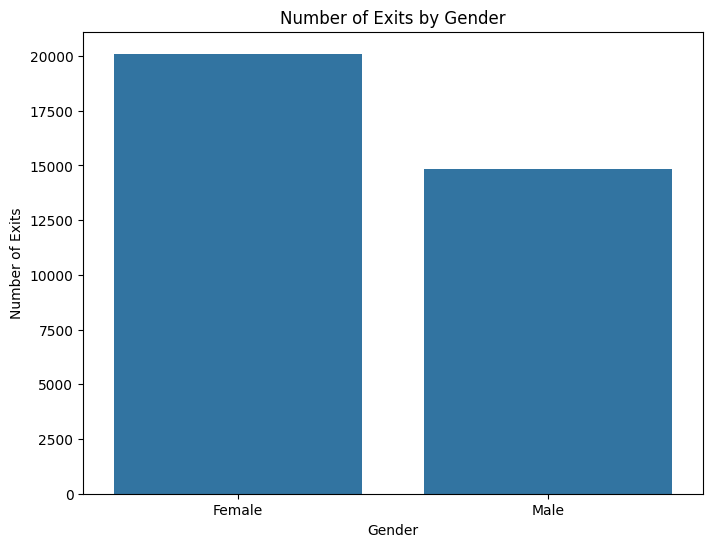

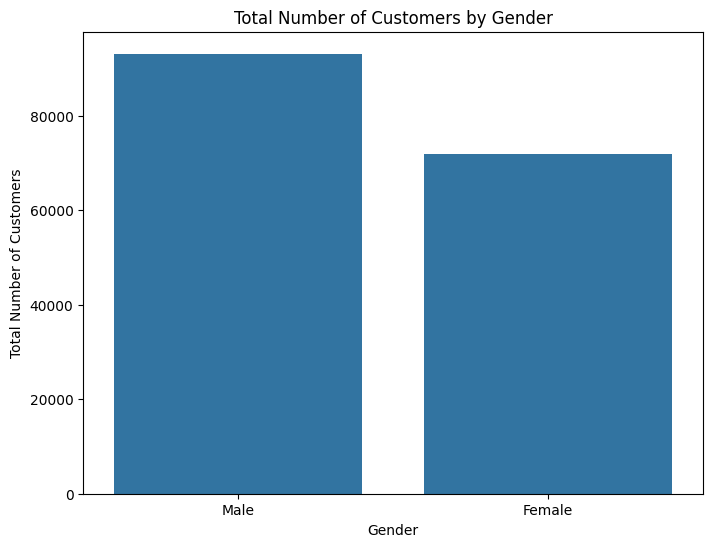

In [103]:
# Calculate the exit rates for male and female customers
gender_exit_rate = data.groupby('Gender')['Exited'].mean()
print("Exit Rates by Gender:\n", gender_exit_rate)

# Calculate the count of exits for male and female customers
gender_exit_count = data.groupby('Gender')['Exited'].sum()
print("Exit Counts by Gender:\n", gender_exit_count)

# Calculate the total number of male and female customers
gender_total_count = data['Gender'].value_counts()
print("Total Counts by Gender:\n", gender_total_count)


# Plot the exit rates for male and female customers
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_exit_rate.index, y=gender_exit_rate.values)
plt.xlabel('Gender')
plt.ylabel('Exit Rate')
plt.title('Exit Rates by Gender')
plt.show()

# Plot the count of exits for male and female customers
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_exit_count.index, y=gender_exit_count.values)
plt.xlabel('Gender')
plt.ylabel('Number of Exits')
plt.title('Number of Exits by Gender')
plt.show()

# Plot the total number of male and female customers
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_total_count.index, y=gender_total_count.values)
plt.xlabel('Gender')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Gender')
plt.show()

### 2

Exit Rates by Credit Score Range:
 CreditScoreRange
300-499    0.23
500-599    0.23
600-699    0.21
700-799    0.20
800-850    0.22
Name: Exited, dtype: float64
Exit Counts by Credit Score Range:
 CreditScoreRange
300-499     1073
500-599     8775
600-699    14967
700-799     8754
800-850      882
Name: Exited, dtype: int64
Total Counts by Credit Score Range:
 CreditScoreRange
300-499     4732
500-599    38108
600-699    72286
700-799    43275
800-850     4101
Name: count, dtype: int64


C:\Users\jaiad\AppData\Local\Temp\ipykernel_14172\1370137640.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_exit_rate = data.groupby('CreditScoreRange')['Exited'].mean()
C:\Users\jaiad\AppData\Local\Temp\ipykernel_14172\1370137640.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_exit_count = data.groupby('CreditScoreRange')['Exited'].sum()


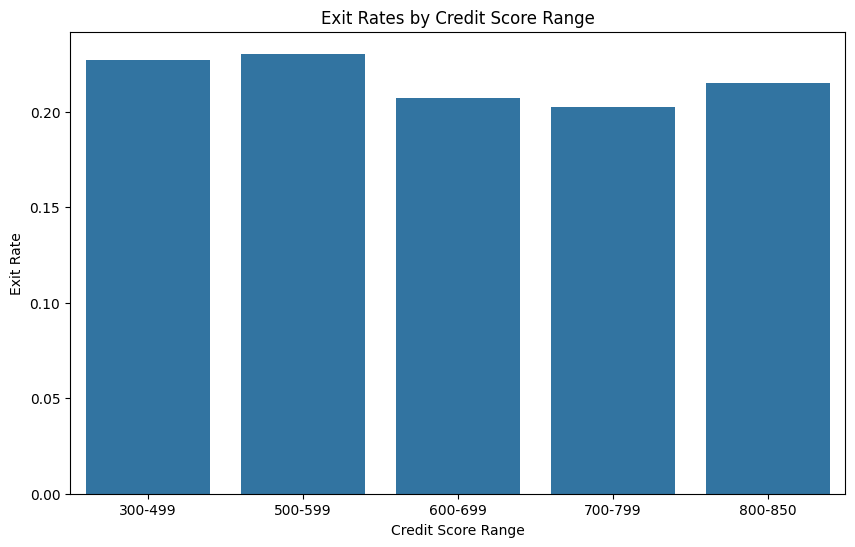

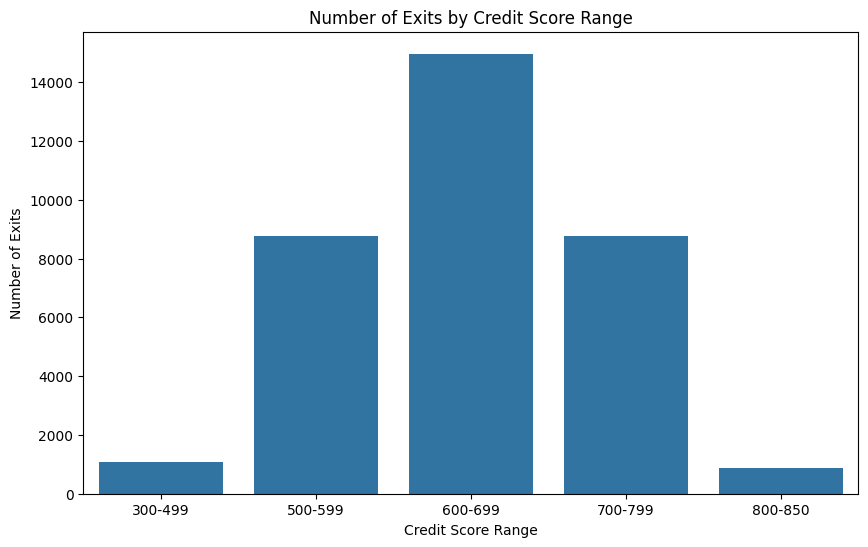

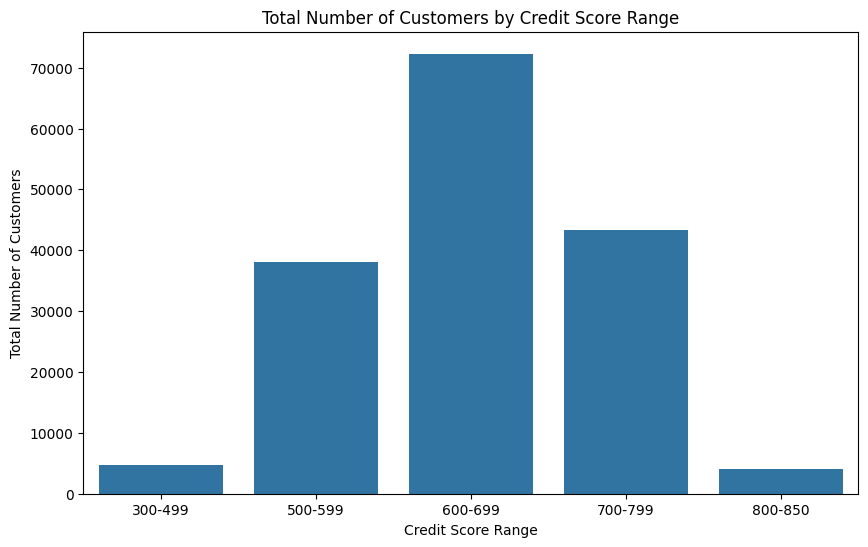

In [104]:
# Create bins for credit scores
bins = [300, 500, 600, 700, 800, 850]
labels = ['300-499', '500-599', '600-699', '700-799', '800-850']
data['CreditScoreRange'] = pd.cut(data['CreditScore'], bins=bins, labels=labels, right=False)

# Calculate the exit rates for different credit score ranges
credit_score_exit_rate = data.groupby('CreditScoreRange')['Exited'].mean()
print("Exit Rates by Credit Score Range:\n", credit_score_exit_rate)

# Calculate the count of exits for different credit score ranges
credit_score_exit_count = data.groupby('CreditScoreRange')['Exited'].sum()
print("Exit Counts by Credit Score Range:\n", credit_score_exit_count)

# Calculate the total number of customers in different credit score ranges
credit_score_total_count = data['CreditScoreRange'].value_counts().sort_index()
print("Total Counts by Credit Score Range:\n", credit_score_total_count)


# Plot the exit rates for different credit score ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=credit_score_exit_rate.index, y=credit_score_exit_rate.values)
plt.xlabel('Credit Score Range')
plt.ylabel('Exit Rate')
plt.title('Exit Rates by Credit Score Range')
plt.show()

# Plot the count of exits for different credit score ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=credit_score_exit_count.index, y=credit_score_exit_count.values)
plt.xlabel('Credit Score Range')
plt.ylabel('Number of Exits')
plt.title('Number of Exits by Credit Score Range')
plt.show()

# Plot the total number of customers in different credit score ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=credit_score_total_count.index, y=credit_score_total_count.values)
plt.xlabel('Credit Score Range')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Credit Score Range')
plt.show()

### 3

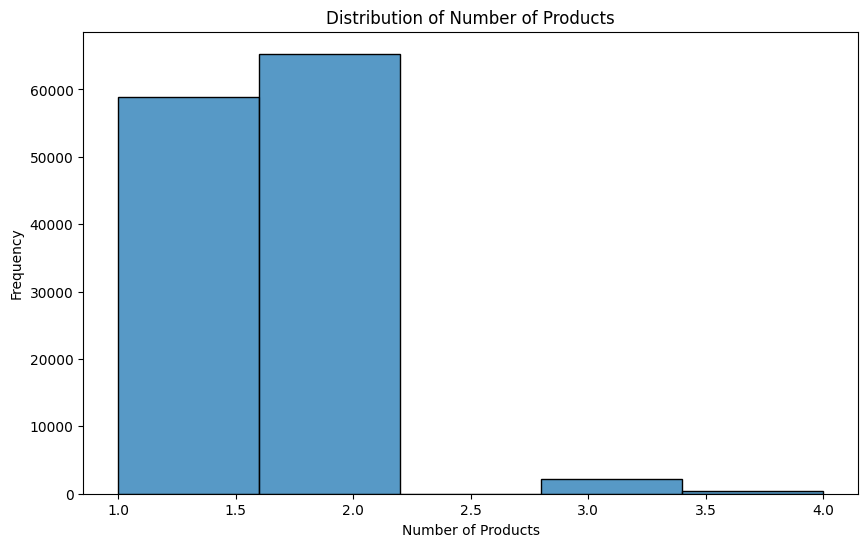

C:\Users\jaiad\AppData\Local\Temp\ipykernel_14172\593253213.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NumOfProducts', y='Exited', data=train_data, ci=None)


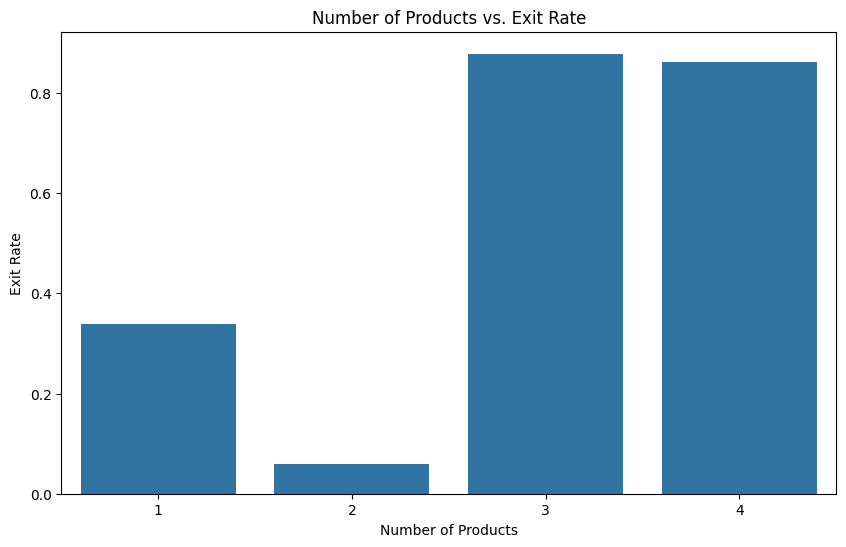

Chi-square test statistic: 21944.14794910601
p-value: 0.0
There is a significant relationship between the number of products and customer exit.


In [105]:


# Histogram of number of products
plt.figure(figsize=(10, 6))
sns.histplot(train_data['NumOfProducts'], bins=5, kde=False)
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

# Bar plot of number of products vs. exit
plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Exited', data=train_data, ci=None)
plt.title('Number of Products vs. Exit Rate')
plt.xlabel('Number of Products')
plt.ylabel('Exit Rate')
plt.show()


# Create a contingency table
contingency_table = pd.crosstab(train_data['NumOfProducts'], train_data['Exited'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("There is a significant relationship between the number of products and customer exit.")
else:
    print("There is no significant relationship between the number of products and customer exit.")

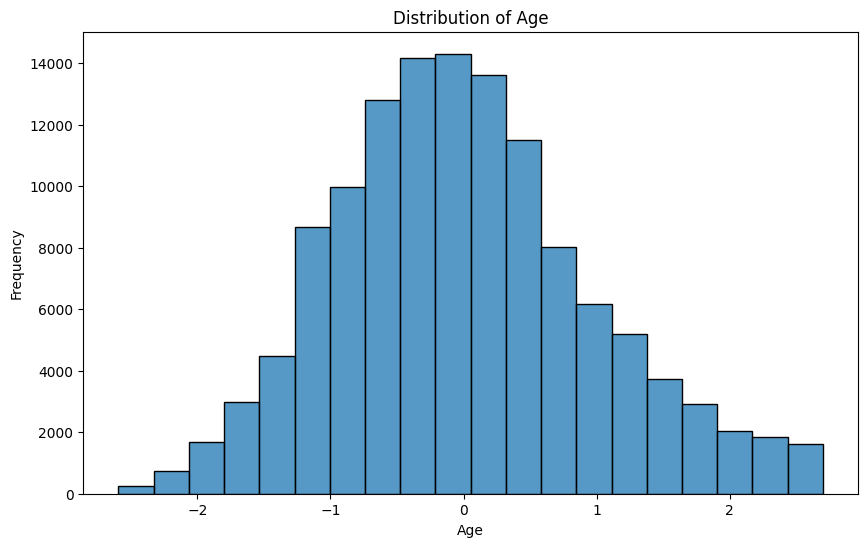

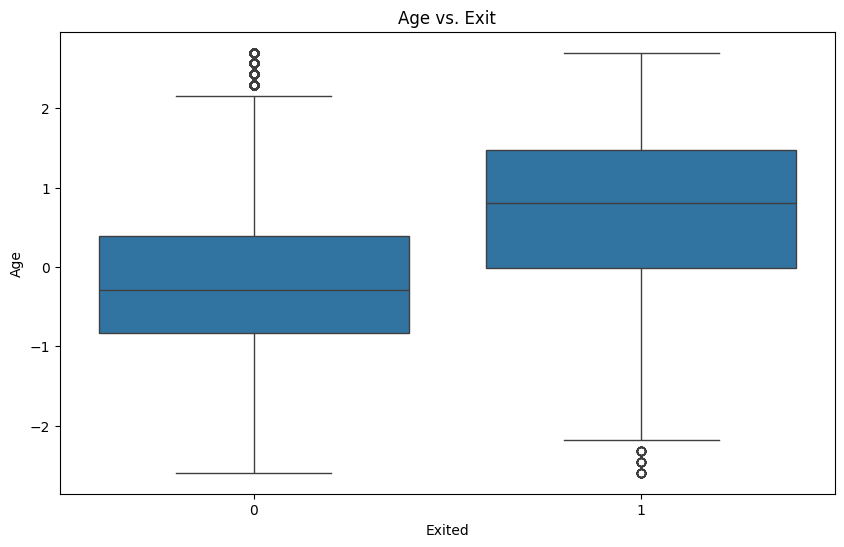

Chi-square test statistic: 0.0
p-value: 1.0
There is no significant relationship between age and customer exit.


In [106]:

#  Data Visualization
# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=20, kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of age vs. exit
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=train_data)
plt.title('Age vs. Exit')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

# Statistical Analysis
# Create age bins
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Create a contingency table
contingency_table = pd.crosstab(train_data['AgeGroup'], train_data['Exited'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("There is a significant relationship between age and customer exit.")
else:
    print("There is no significant relationship between age and customer exit.")

IsActiveMember
0.0    0.30
1.0    0.13
Name: Exited, dtype: float64
IsActiveMember
0.0    24624
1.0    10297
Name: Exited, dtype: int64
IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64


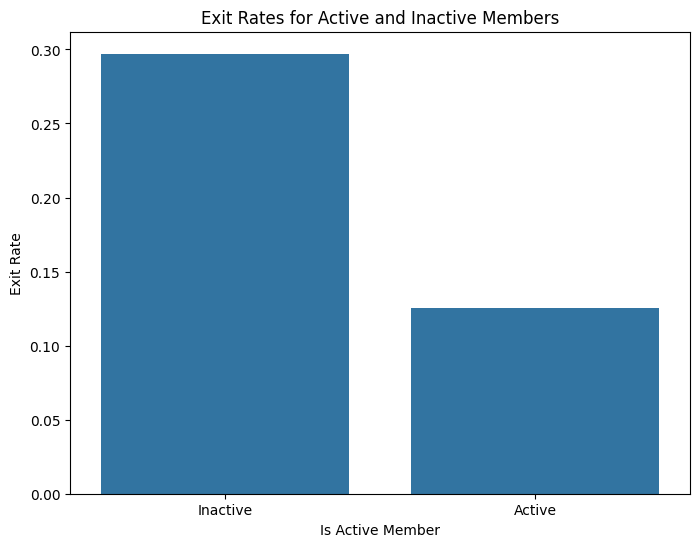

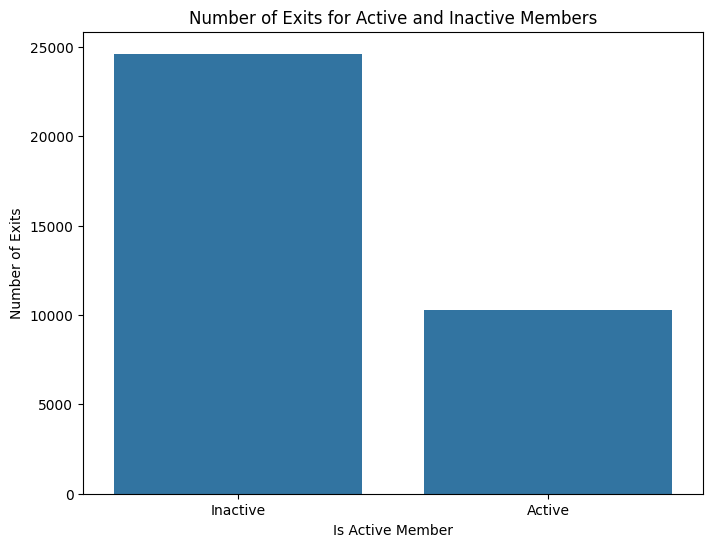

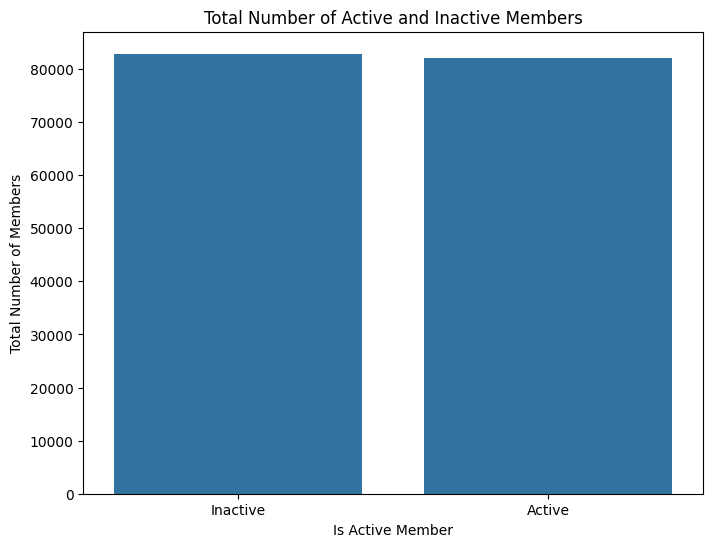

In [107]:
#5
# Calculate the exit rates for active and inactive members
exit_rates = data.groupby('IsActiveMember')['Exited'].mean()
print(exit_rates)

# Calculate the count of exits for active and inactive members
exit_counts = data.groupby('IsActiveMember')['Exited'].sum()
print(exit_counts)

# Calculate the total number of active and inactive members
total_counts = data['IsActiveMember'].value_counts()
print(total_counts)


# Plot the exit rates for active and inactive members
plt.figure(figsize=(8, 6))
sns.barplot(x=exit_rates.index, y=exit_rates.values)
plt.xlabel('Is Active Member')
plt.ylabel('Exit Rate')
plt.title('Exit Rates for Active and Inactive Members')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.show()

# Plot the count of exits for active and inactive members
plt.figure(figsize=(8, 6))
sns.barplot(x=exit_counts.index, y=exit_counts.values)
plt.xlabel('Is Active Member')
plt.ylabel('Number of Exits')
plt.title('Number of Exits for Active and Inactive Members')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.show()

# Plot the total number of active and inactive members
plt.figure(figsize=(8, 6))
sns.barplot(x=total_counts.index, y=total_counts.values)
plt.xlabel('Is Active Member')
plt.ylabel('Total Number of Members')
plt.title('Total Number of Active and Inactive Members')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.show()

Mean Estimated Salary:
 Exited
0    112084.29
1    114402.50
Name: EstimatedSalary, dtype: float64
Median Estimated Salary:
 Exited
0    116977.89
1    120892.96
Name: EstimatedSalary, dtype: float64
Estimated Salary Distribution:
            count       mean       std    min       25%        50%        75%  \
Exited                                                                         
0       130113.0  112084.29  50214.66  11.58  74425.41  116977.89  153727.32   
1        34921.0  114402.50  50542.03  11.58  74965.44  120892.96  158750.53   

              max  
Exited             
0       199992.48  
1       199992.48  


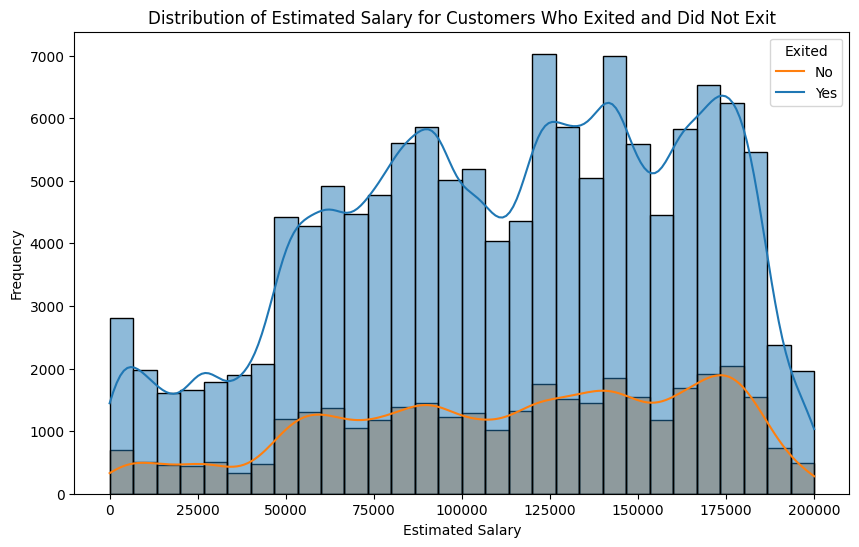

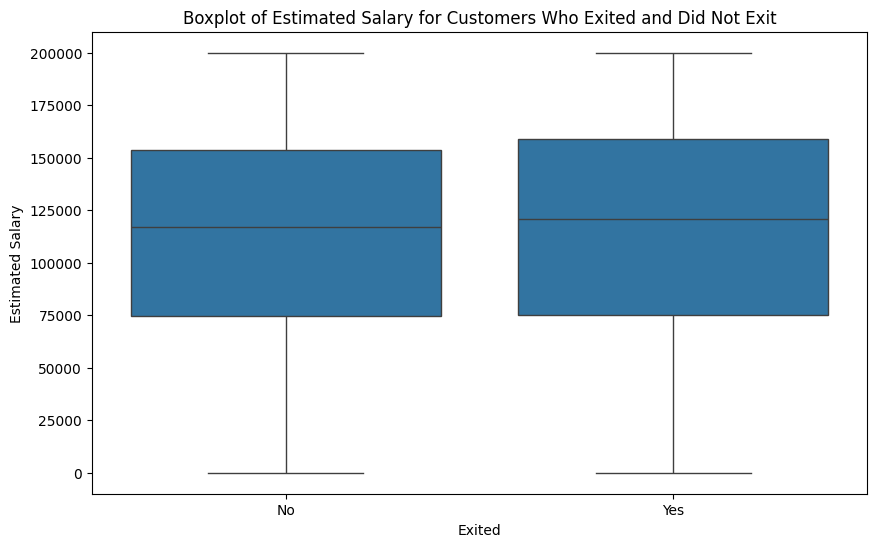

In [108]:
#6
# Calculate the mean estimated salary for customers who exited and those who did not
salary_exit_mean = data.groupby('Exited')['EstimatedSalary'].mean()
print("Mean Estimated Salary:\n", salary_exit_mean)

# Calculate the median estimated salary for customers who exited and those who did not
salary_exit_median = data.groupby('Exited')['EstimatedSalary'].median()
print("Median Estimated Salary:\n", salary_exit_median)

# Calculate the distribution of estimated salary for customers who exited and those who did not
salary_exit_distribution = data.groupby('Exited')['EstimatedSalary'].describe()
print("Estimated Salary Distribution:\n", salary_exit_distribution)

# Plot the distribution of estimated salary for customers who exited and those who did not
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='EstimatedSalary', hue='Exited', kde=True, bins=30)
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Salary for Customers Who Exited and Did Not Exit')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

# Boxplot to compare the estimated salary for customers who exited and those who did not
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.title('Boxplot of Estimated Salary for Customers Who Exited and Did Not Exit')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Exit Rates:
 HasCrCard
0.0    0.23
1.0    0.21
Name: Exited, dtype: float64
Exit Counts:
 HasCrCard
0.0     9235
1.0    25686
Name: Exited, dtype: int64
Total Counts:
 HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64


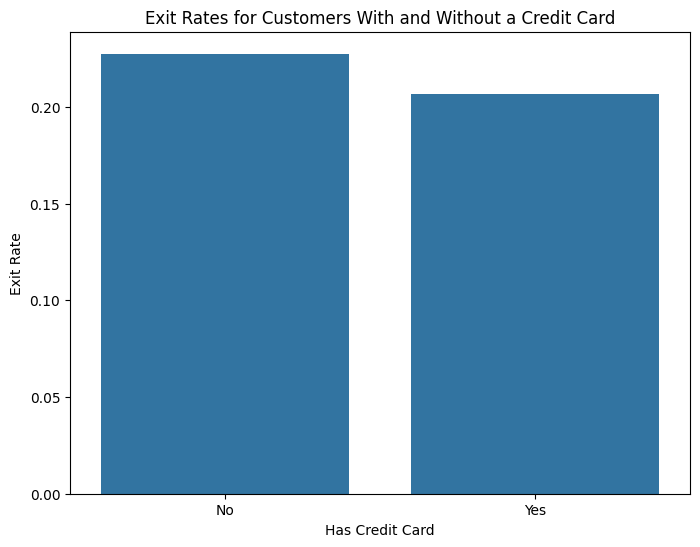

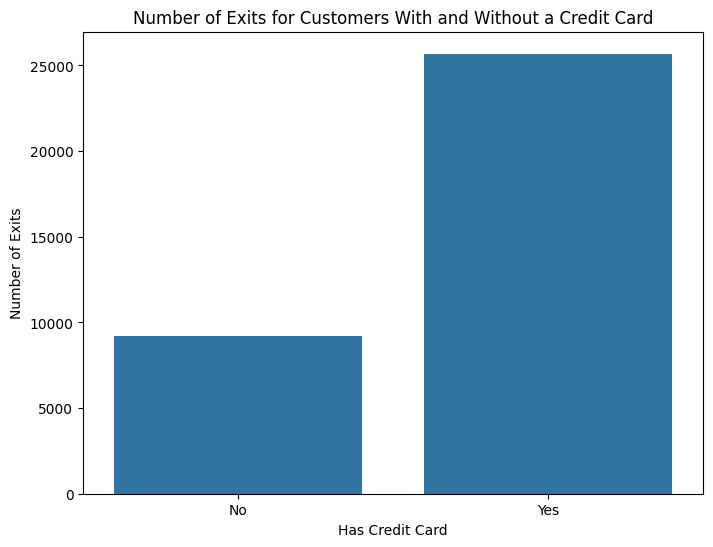

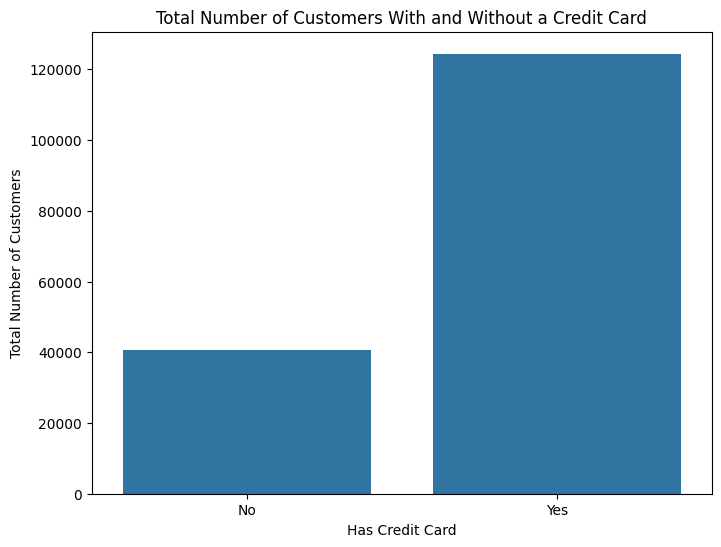

In [109]:
#7
#  Calculate the exit rates for customers with and without a credit card
credit_card_exit_rate = data.groupby('HasCrCard')['Exited'].mean()
print("Exit Rates:\n", credit_card_exit_rate)

# Calculate the count of exits for customers with and without a credit card
credit_card_exit_count = data.groupby('HasCrCard')['Exited'].sum()
print("Exit Counts:\n", credit_card_exit_count)

# Calculate the total number of customers with and without a credit card
credit_card_total_count = data['HasCrCard'].value_counts()
print("Total Counts:\n", credit_card_total_count)


# Plot the exit rates for customers with and without a credit card
plt.figure(figsize=(8, 6))
sns.barplot(x=credit_card_exit_rate.index, y=credit_card_exit_rate.values)
plt.xlabel('Has Credit Card')
plt.ylabel('Exit Rate')
plt.title('Exit Rates for Customers With and Without a Credit Card')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Plot the count of exits for customers with and without a credit card
plt.figure(figsize=(8, 6))
sns.barplot(x=credit_card_exit_count.index, y=credit_card_exit_count.values)
plt.xlabel('Has Credit Card')
plt.ylabel('Number of Exits')
plt.title('Number of Exits for Customers With and Without a Credit Card')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Plot the total number of customers with and without a credit card
plt.figure(figsize=(8, 6))
sns.barplot(x=credit_card_total_count.index, y=credit_card_total_count.values)
plt.xlabel('Has Credit Card')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers With and Without a Credit Card')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Exit Rates by Tenure:
 Tenure
0     0.25
1     0.23
2     0.19
3     0.23
4     0.23
5     0.22
6     0.20
7     0.19
8     0.20
9     0.21
10    0.21
Name: Exited, dtype: float64
Exit Counts by Tenure:
 Tenure
0     1276
1     3790
2     3516
3     3810
4     3974
5     3800
6     3145
7     3341
8     3468
9     3544
10    1257
Name: Exited, dtype: int64
Total Counts by Tenure:
 Tenure
0      5007
1     16760
2     18045
3     16630
4     17554
5     17268
6     15822
7     17810
8     17520
9     16709
10     5909
Name: count, dtype: int64


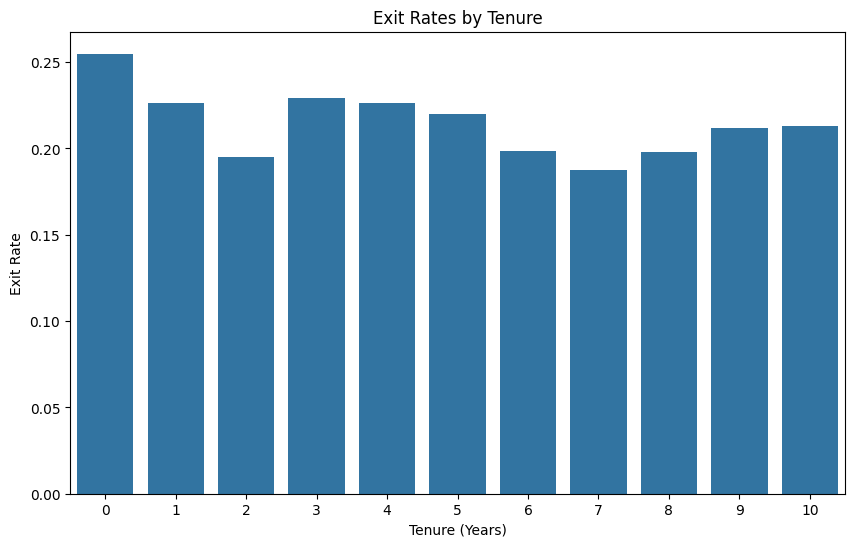

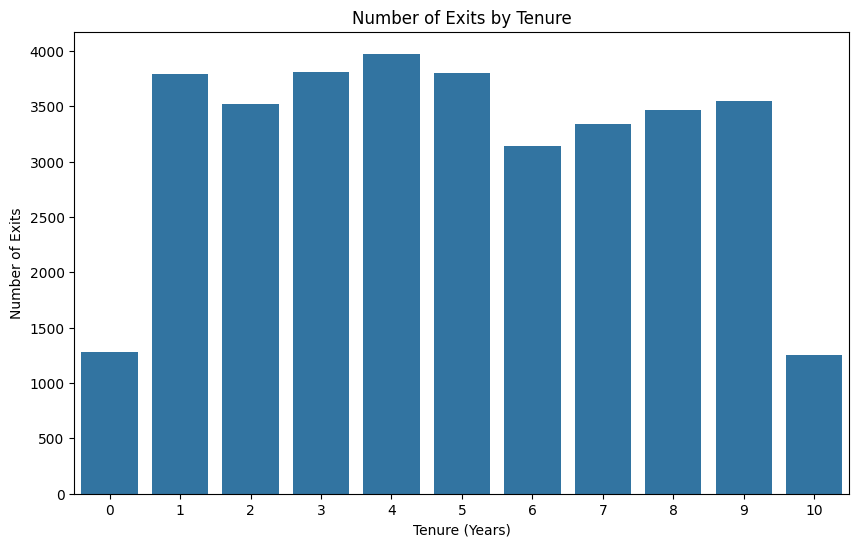

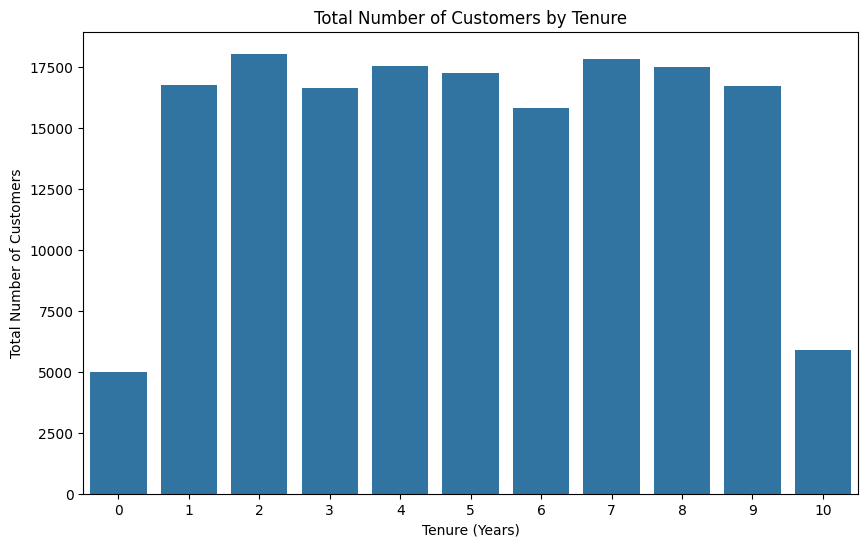

In [110]:
# 8
#  Calculate the exit rates for different tenure groups
tenure_exit_rate = data.groupby('Tenure')['Exited'].mean()
print("Exit Rates by Tenure:\n", tenure_exit_rate)

# Calculate the count of exits for different tenure groups
tenure_exit_count = data.groupby('Tenure')['Exited'].sum()
print("Exit Counts by Tenure:\n", tenure_exit_count)

# Calculate the total number of customers in different tenure groups
tenure_total_count = data['Tenure'].value_counts().sort_index()
print("Total Counts by Tenure:\n", tenure_total_count)


# Plot the exit rates for different tenure groups
plt.figure(figsize=(10, 6))
sns.barplot(x=tenure_exit_rate.index, y=tenure_exit_rate.values)
plt.xlabel('Tenure (Years)')
plt.ylabel('Exit Rate')
plt.title('Exit Rates by Tenure')
plt.show()

# Plot the count of exits for different tenure groups
plt.figure(figsize=(10, 6))
sns.barplot(x=tenure_exit_count.index, y=tenure_exit_count.values)
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Exits')
plt.title('Number of Exits by Tenure')
plt.show()

# Plot the total number of customers in different tenure groups
plt.figure(figsize=(10, 6))
sns.barplot(x=tenure_total_count.index, y=tenure_total_count.values)
plt.xlabel('Tenure (Years)')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Tenure')
plt.show()

# PHASE 2

In [123]:
# Separate features (X) and target (y)
X = df.drop(['Exited', 'id', 'CustomerId', 'Surname'], axis=1)  # Dropping unnecessary columns
y = df['Exited']

# Create train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify columns
print("Columns after split:")
print(X_train.columns.tolist())

Columns after split:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [124]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# 1. Encode Gender using Label Encoder
label_encoder = LabelEncoder()
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = label_encoder.transform(X_test['Gender'])

# 2. One-Hot Encode Geography
geography_dummies_train = pd.get_dummies(X_train['Geography'], prefix='Geography')
geography_dummies_test = pd.get_dummies(X_test['Geography'], prefix='Geography')

# Drop one category (France) to avoid multicollinearity
geography_dummies_train = geography_dummies_train.drop('Geography_France', axis=1)
geography_dummies_test = geography_dummies_test.drop('Geography_France', axis=1)

# Add dummy variables to the datasets
X_train = pd.concat([X_train, geography_dummies_train], axis=1)
X_test = pd.concat([X_test, geography_dummies_test], axis=1)

# Drop the original Geography column
X_train = X_train.drop('Geography', axis=1)
X_test = X_test.drop('Geography', axis=1)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Verify the final shape and data types
print("\nFinal shape of training data:", X_train_scaled.shape)
print("Final columns:", X_train_scaled.columns.tolist())


Final shape of training data: (132027, 11)
Final columns: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']


## Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
print("Random Forest Results:")
print("---------------------")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
})
print("\nTop 10 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head(10))

Random Forest Results:
---------------------
Accuracy: 0.8583
ROC-AUC: 0.8749

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26052
           1       0.72      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007


Confusion Matrix:
[[24568  1484]
 [ 3193  3762]]

Top 10 Most Important Features:
             feature  importance
2                Age        0.23
8    EstimatedSalary        0.17
0        CreditScore        0.16
5      NumOfProducts        0.14
4            Balance        0.11
3             Tenure        0.08
7     IsActiveMember        0.05
9  Geography_Germany        0.03
1             Gender        0.02
6          HasCrCard        0.01


In [131]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
print("Training Naive Bayes model...")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test_scaled)
nb_pred_proba = nb_model.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
print("\nNaive Bayes Results:")
print("-------------------")
print(f"Accuracy: {accuracy_score(y_test, nb_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, nb_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_pred))

Training Naive Bayes model...

Naive Bayes Results:
-------------------
Accuracy: 0.8104
ROC-AUC: 0.8182

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     26052
           1       0.56      0.46      0.51      6955

    accuracy                           0.81     33007
   macro avg       0.71      0.68      0.69     33007
weighted avg       0.80      0.81      0.80     33007


Confusion Matrix:
[[23553  2499]
 [ 3760  3195]]


In [133]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
print("Training Neural Network model...")
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    max_iter=1000,                # maximum iterations
    random_state=42,
    early_stopping=True,          # enables early stopping
    validation_fraction=0.1       # 10% of training data used for validation
)

nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_pred = nn_model.predict(X_test_scaled)
nn_pred_proba = nn_model.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
print("\nNeural Network Results:")
print("---------------------")
print(f"Accuracy: {accuracy_score(y_test, nn_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, nn_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, nn_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_pred))

# Print the model architecture
print("\nModel Architecture:")
print(f"Input Layer Size: {X_train_scaled.shape[1]}")
print(f"Hidden Layers: {nn_model.hidden_layer_sizes}")
print(f"Output Layer Size: {len(np.unique(y_train))}")
print(f"Total iterations: {nn_model.n_iter_}")

Training Neural Network model...

Neural Network Results:
---------------------
Accuracy: 0.8638
ROC-AUC: 0.8883

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     26052
           1       0.72      0.58      0.64      6955

    accuracy                           0.86     33007
   macro avg       0.81      0.76      0.78     33007
weighted avg       0.86      0.86      0.86     33007


Confusion Matrix:
[[24449  1603]
 [ 2893  4062]]

Model Architecture:
Input Layer Size: 11
Hidden Layers: (100, 50)
Output Layer Size: 2
Total iterations: 24


## Comparision and Analysis


Model Comparison:
----------------
            Model  Accuracy  ROC-AUC
2  Neural Network      0.86     0.89
0   Random Forest      0.86     0.87
1     Naive Bayes      0.81     0.82


C:\Users\jaiad\AppData\Local\Temp\ipykernel_14172\3983463240.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\jaiad\AppData\Local\Temp\ipykernel_14172\3983463240.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


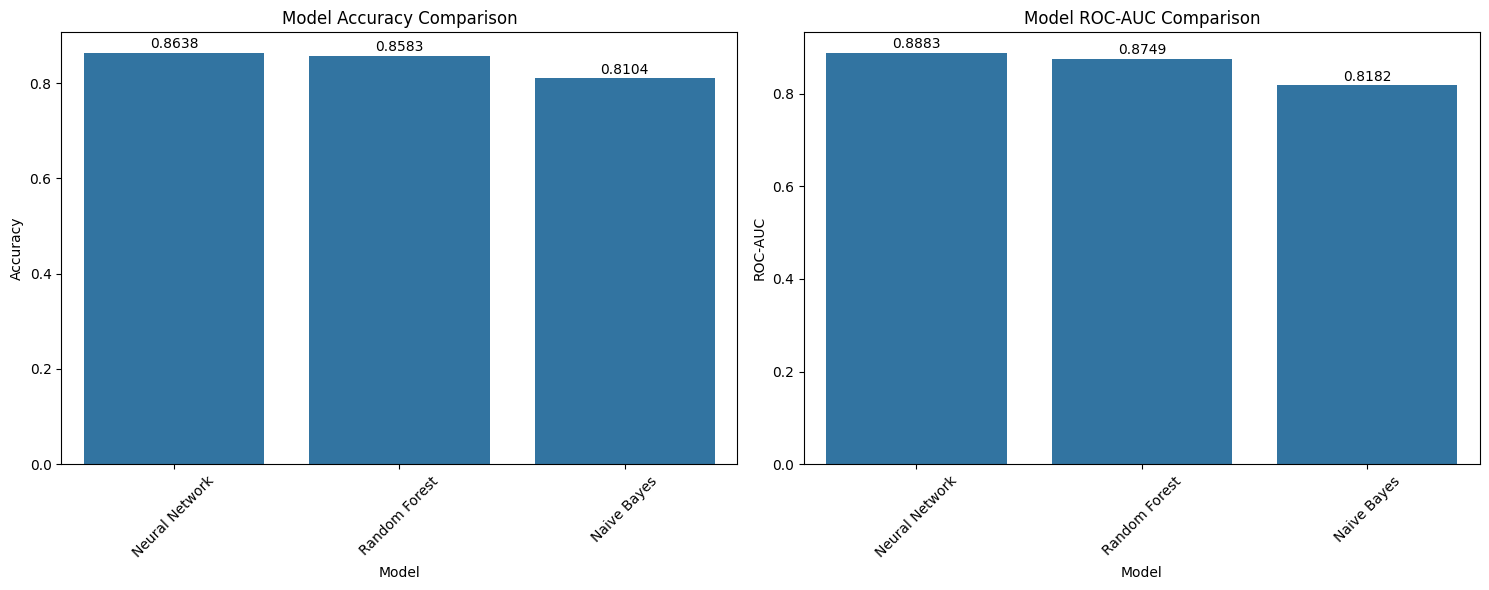


Best Performing Model: Neural Network
Accuracy: 0.8638
ROC-AUC: 0.8883


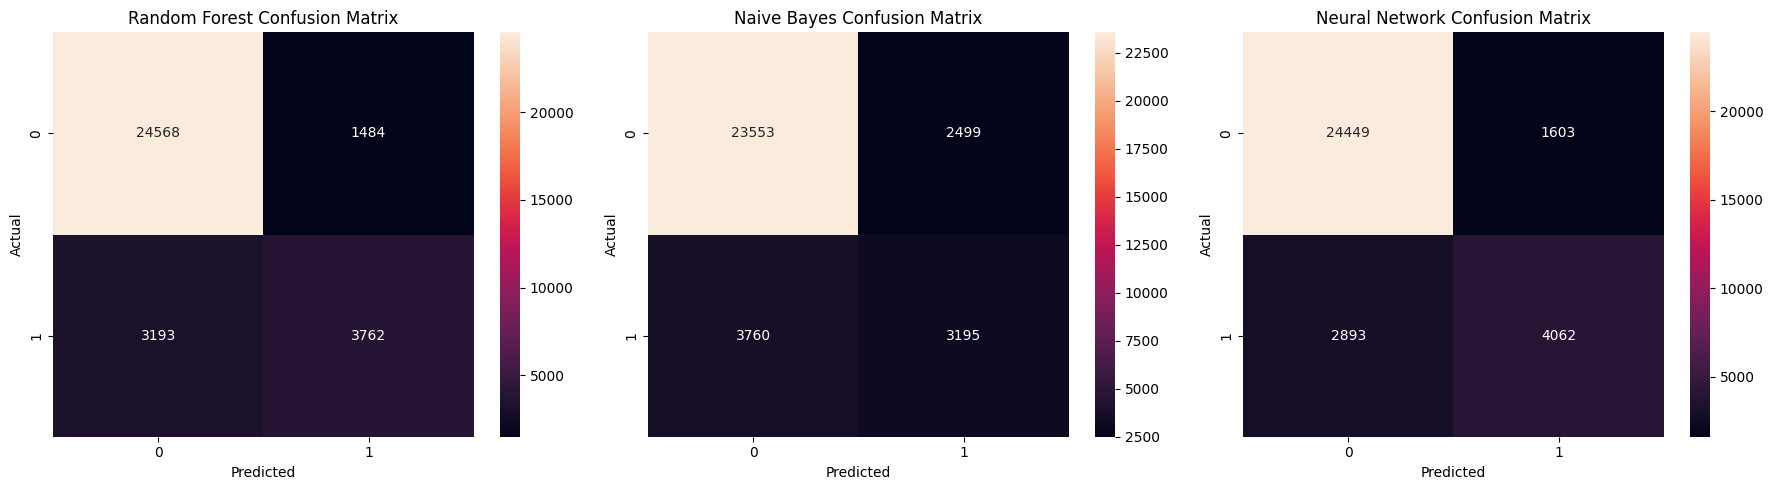

In [135]:
# Create a dictionary with all models' results
model_results = {
   'Random Forest': {
       'accuracy': accuracy_score(y_test, rf_pred),
       'roc_auc': roc_auc_score(y_test, rf_pred_proba)
   },
   'Naive Bayes': {
       'accuracy': accuracy_score(y_test, nb_pred),
       'roc_auc': roc_auc_score(y_test, nb_pred_proba)
   },
   'Neural Network': {
       'accuracy': accuracy_score(y_test, nn_pred),
       'roc_auc': roc_auc_score(y_test, nn_pred_proba)
   }
}

# Create comparison DataFrame
comparison_df = pd.DataFrame({
   'Model': model_results.keys(),
   'Accuracy': [results['accuracy'] for results in model_results.values()],
   'ROC-AUC': [results['roc_auc'] for results in model_results.values()]
})

# Sort by accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# Print comparison table
print("\nModel Comparison:")
print("----------------")
print(comparison_df)

# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Accuracy comparison
sns.barplot(x='Model', y='Accuracy', data=comparison_df, ax=ax1)
ax1.set_title('Model Accuracy Comparison')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for i, v in enumerate(comparison_df['Accuracy']):
   ax1.text(i, v + 0.01, f'{v:.4f}', ha='center')

# Plot ROC-AUC comparison
sns.barplot(x='Model', y='ROC-AUC', data=comparison_df, ax=ax2)
ax2.set_title('Model ROC-AUC Comparison')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
for i, v in enumerate(comparison_df['ROC-AUC']):
   ax2.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

# Identify best performing model
best_model = comparison_df.iloc[0]
print(f"\nBest Performing Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"ROC-AUC: {best_model['ROC-AUC']:.4f}")

# Additional comparison - Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot confusion matrix for each model
models = {
   'Random Forest': rf_pred,
   'Naive Bayes': nb_pred,
   'Neural Network': nn_pred
}

for i, (name, predictions) in enumerate(models.items()):
   cm = confusion_matrix(y_test, predictions)
   sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
   axes[i].set_title(f'{name} Confusion Matrix')
   axes[i].set_xlabel('Predicted')
   axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Bank Customer Churn Prediction Analysis Report

## 1. Our Journey with Data Preparation

Starting with raw bank customer data, we faced several challenges that needed careful handling:

### Data Cleaning & Processing
- We first encountered customer information in various formats:
 * Location data (France, Spain, Germany) needed special treatment
 * Gender information had to be converted to a format our models could understand
 * Numerical data like age and balance required standardization
- We removed personal information like surnames and customer IDs that wouldn't help predict churn
- Made sure our data was clean and ready for analysis

## 2. Choosing and Testing Our Models

### Random Forest: Our Reliable Ensemble Method (86% Accuracy)

**Why we chose it:**
- Works great with complex customer relationships
- Handles both numbers and categories naturally
- Shows us which factors matter most in customer churn
- Less likely to overfit to our training data

**How it performed:**
- Hit an impressive 86% accuracy
- Strong ROC-AUC score of 0.87
- Proved reliable in identifying both leaving and staying customers

### Naive Bayes: Our Quick and Efficient Approach (81% Accuracy)

**Why we chose it:**
- Offers a different, probability-based perspective
- Extremely fast and efficient
- Works well even with many features
- Simple but powerful

**Real-world performance:**
- Achieved a solid 81% accuracy
- ROC-AUC of 0.82 showed good reliability
- Gave us quick, dependable results

### Neural Network: Our Advanced Solution (86% Accuracy)

**Why we chose it:**
- Can uncover hidden patterns in customer behavior
- Learns complex relationships automatically
- Perfect for our large customer dataset
- Modern approach to a complex problem

**How we built and trained it:**
- Designed a smart architecture with two hidden layers
- Used modern techniques to prevent overfitting
- Let it learn at its own pace with early stopping
- Result: Our most sophisticated model

## 3. Comparing Our Models

Looking at how our models performed side by side:
- Neural Network and Random Forest tied at 86% accuracy
- Neural Network slightly better at ranking risky customers
- Each model brought something unique to the table

## 4. Real Business Value
- We can now predict customer churn with high confidence
- Banks can intervene before customers leave
- Focus resources on customers most likely to churn
- Make data-driven decisions about customer retention

## 5. Challenges We Overcame

### Data Challenges
- Turned text data into numbers our models could understand
- Made sure all numbers were on the same scale
- Kept only the most relevant information

### Solution Strategy
- Built a systematic approach to data preparation
- Carefully selected and engineered features
- Used consistent testing methods across all models

## 6. Final Thoughts
Our analysis shows we can reliably predict customer churn. Both the Neural Network and Random Forest proved excellent at this task, while Naive Bayes provided a solid baseline. These tools give banks the power to act before customers leave, potentially saving millions in lost business.

Most importantly, we now have a trusted system to identify at-risk customers early, allowing for timely intervention and better customer retention strategies.